# EDA

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사   
carrier_deay : 항공사 지연 요인   
atc_delay : ATC 항공교통관제 지연 요인   
weather_delay : 날씨로 인한 지연 요인

In [123]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv("./data/airline_stats.csv")
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [126]:
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

---------------

만약, 결측치가 지연되지 않았을 경우라면 Delta 항공이 제일 지연 확률이 적다.

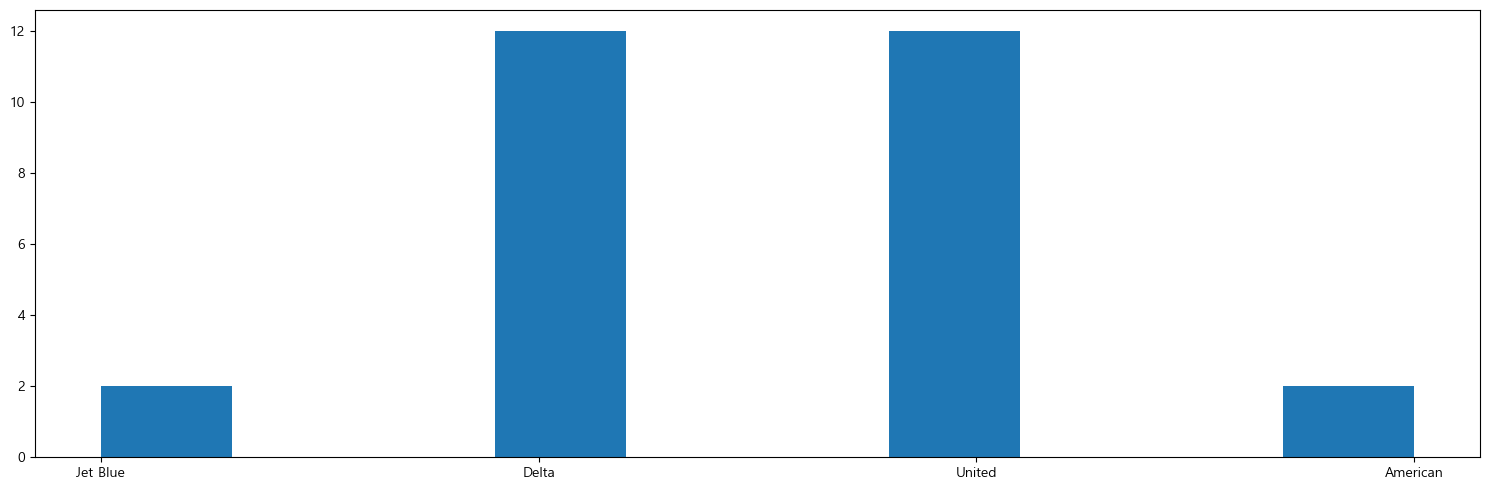

In [127]:
df_na = df[df['pct_atc_delay'].isna() == True]

fig = plt.figure(figsize=(15, 5))
plt.hist(x=df_na['airline'])
plt.tight_layout()

-----------------------------------

앞으로 할 분석에 대해 결측치 의 경우 필요없음, 전부 NAN 이기 때문에 삭제 후, 진행

In [128]:
df = df.dropna()

Delta 항공의 지연비율이 제일 높다.

이 데이터가 전체라는 가정을 가지면, Delta 항공의 경우 지연될 가능성이 높으니 기피 항공사일 확률이 높다.

위의 그래프와 완전히 반대되는 결과, 결측치는 지연이 안된것이 아닌 측정이 안된것으로 판단된다.

따라서 결측치를 삭제하는 것은 옳은 판단.

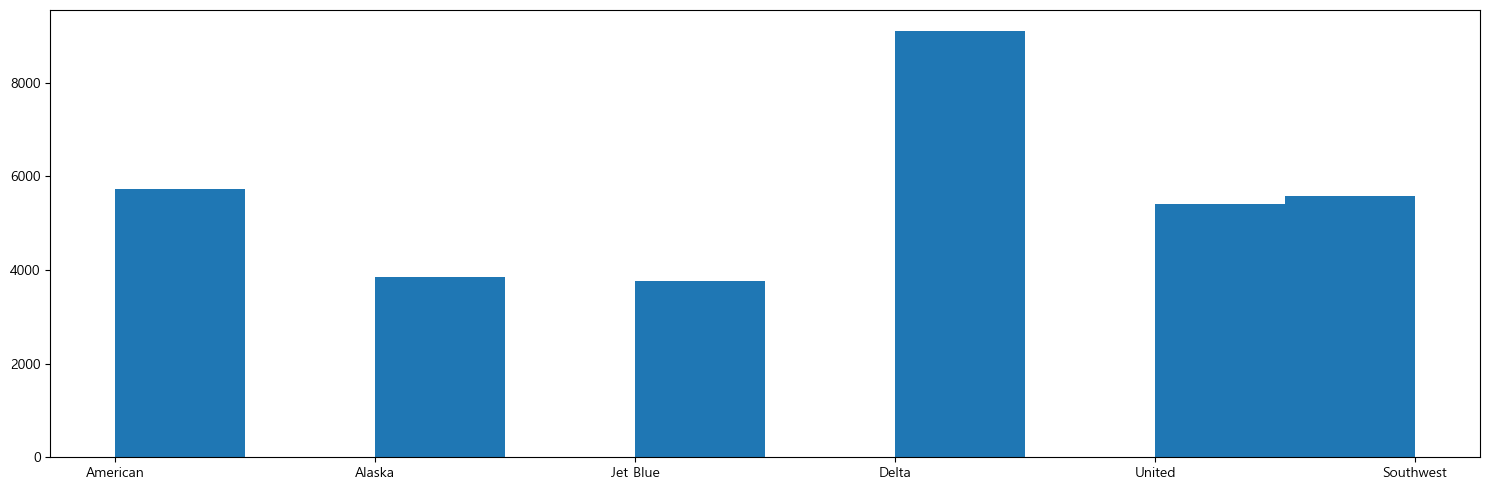

In [129]:
fig = plt.figure(figsize=(15, 5))
plt.hist(x=df['airline'])
plt.tight_layout()

--------------------

항공사 문제가 아니라면 일단 출발하기는 한다. 아무리 늦어도...

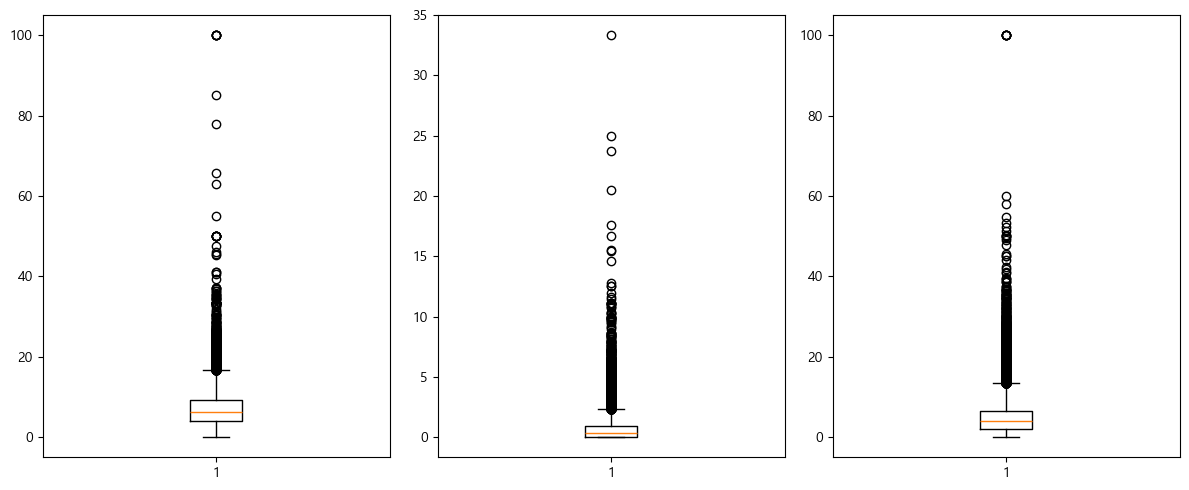

In [130]:
a = ['pct_carrier_delay', 'pct_weather_delay', 'pct_atc_delay']

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.boxplot(x=df['pct_carrier_delay'])
ax2.boxplot(x=df['pct_weather_delay'])
ax3.boxplot(x=df['pct_atc_delay'])


plt.tight_layout()
plt.show()

<Axes: title={'center': 'pct_atc_delay'}, xlabel='airline'>

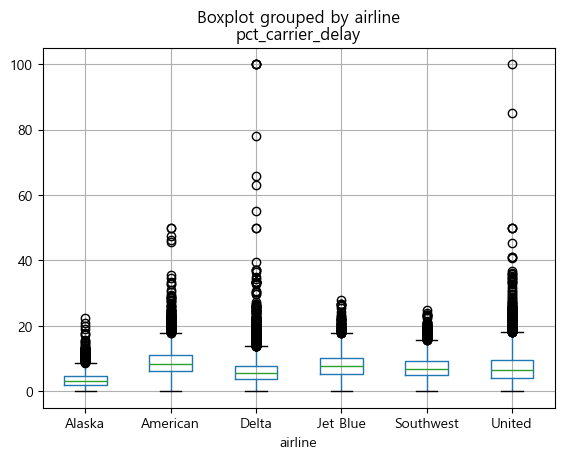

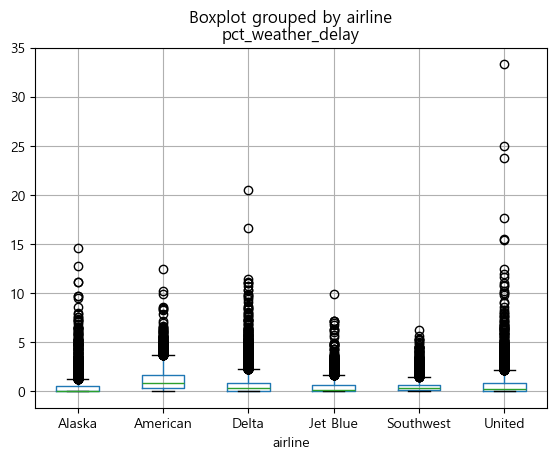

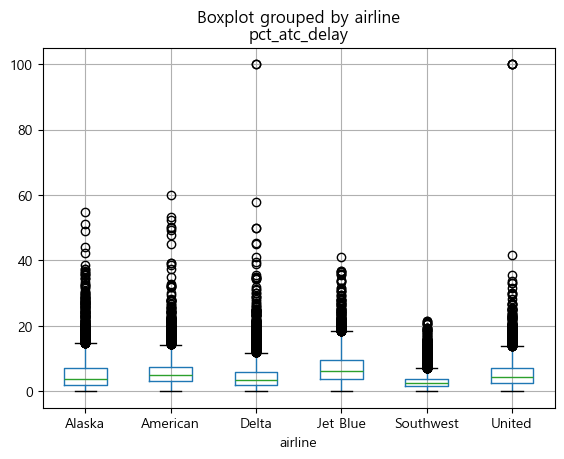

In [131]:

df.boxplot(by='airline', column='pct_carrier_delay')
df.boxplot(by='airline', column='pct_weather_delay')
df.boxplot(by='airline', column='pct_atc_delay')

In [132]:
df_group = df.groupby('airline').mean()
df_group

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.521889,5.472672,0.513497
American,9.042180,5.993529,1.122920
Delta,6.333460,4.462978,0.680765
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697


------------------

전체적으로 항공사 문제비율이 높다.

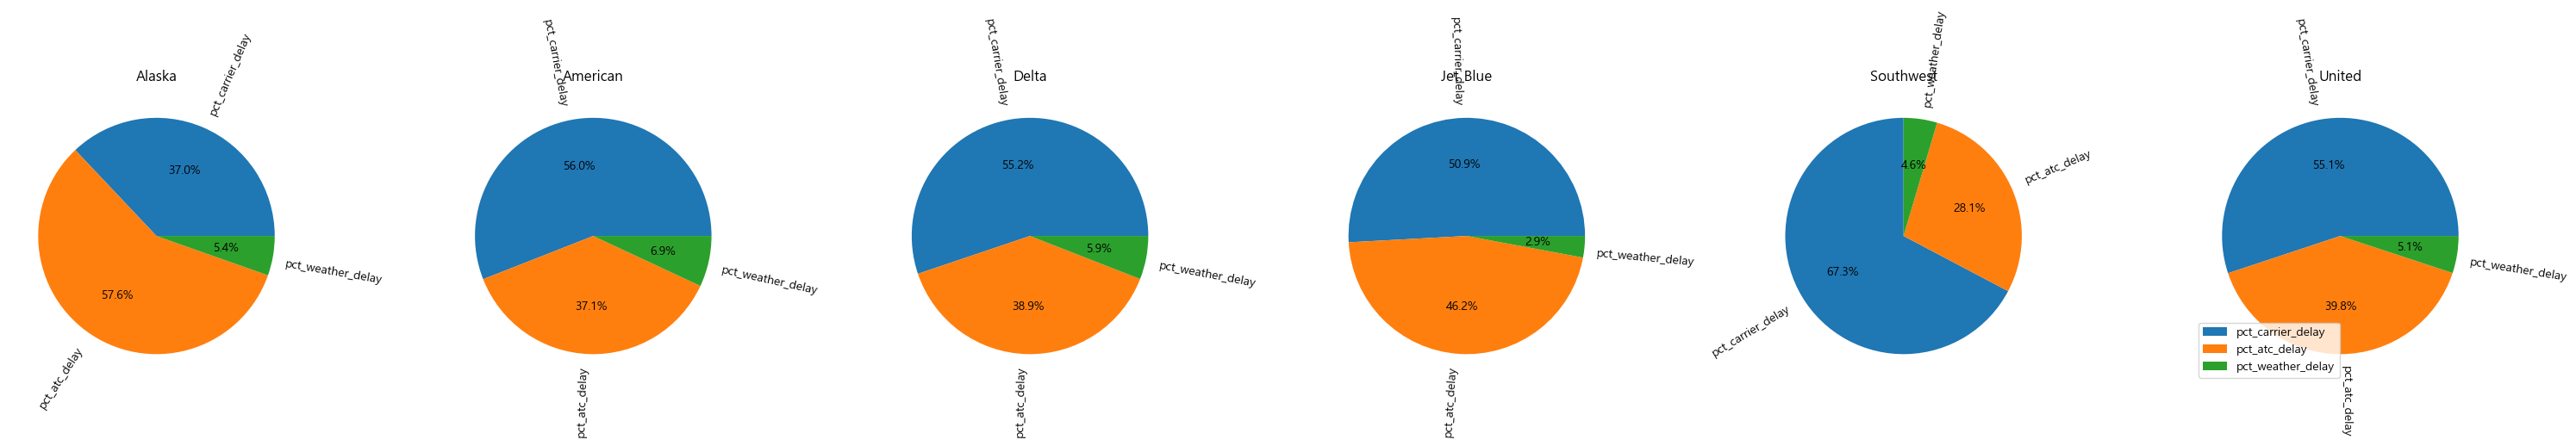

In [133]:
fig = plt.figure(figsize=(30, 12))

ax1 = fig.add_subplot(1, 6, 1)
ax2 = fig.add_subplot(1, 6, 2)
ax3 = fig.add_subplot(1, 6, 3)

ax4 = fig.add_subplot(1, 6, 4)
ax5 = fig.add_subplot(1, 6, 5)
ax6 = fig.add_subplot(1, 6, 6)


ax1.pie(x=df_group.loc['Alaska'],
        labels=df_group.loc['Alaska'].index,
        autopct="%1.1f%%",
        rotatelabels=30
        )
ax1.set_title('Alaska')


ax2.pie(x=df_group.loc['American'],
        labels=df_group.loc['American'].index,
        autopct="%1.1f%%",
        rotatelabels=30
        )
ax2.set_title('American')

ax3.pie(x=df_group.loc['Delta'],
        labels=df_group.loc['Delta'].index,
        autopct="%1.1f%%",
        rotatelabels=30
        )
ax3.set_title('Delta')



ax4.pie(x=df_group.loc['Jet Blue'],
        labels=df_group.loc['Jet Blue'].index,
        autopct="%1.1f%%",
        rotatelabels=30
        )
ax4.set_title('Jet Blue')

ax5.pie(x=df_group.loc['Southwest'],
        labels=df_group.loc['Southwest'].index,
        autopct="%1.1f%%",
        startangle=90,
        rotatelabels=30
        )
ax5.set_title('Southwest')

ax6.pie(x=df_group.loc['United'],
        labels=df_group.loc['United'].index,
        autopct="%1.1f%%",
        rotatelabels=30
        )
ax6.set_title('United')


plt.legend()
plt.tight_layout()

---------------------------

날씨 때문에 관제탑에서 지연 시킬 확률은 높다.
날씨가 안좋으면 지연 가능성이 높다.

In [134]:


df2 = df.drop(columns='airline')
df2 = df2.corr()

In [135]:
df2

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


In [136]:
df2['pct_carrier_delay']['pct_atc_delay']

np.float64(0.14447391902698253)

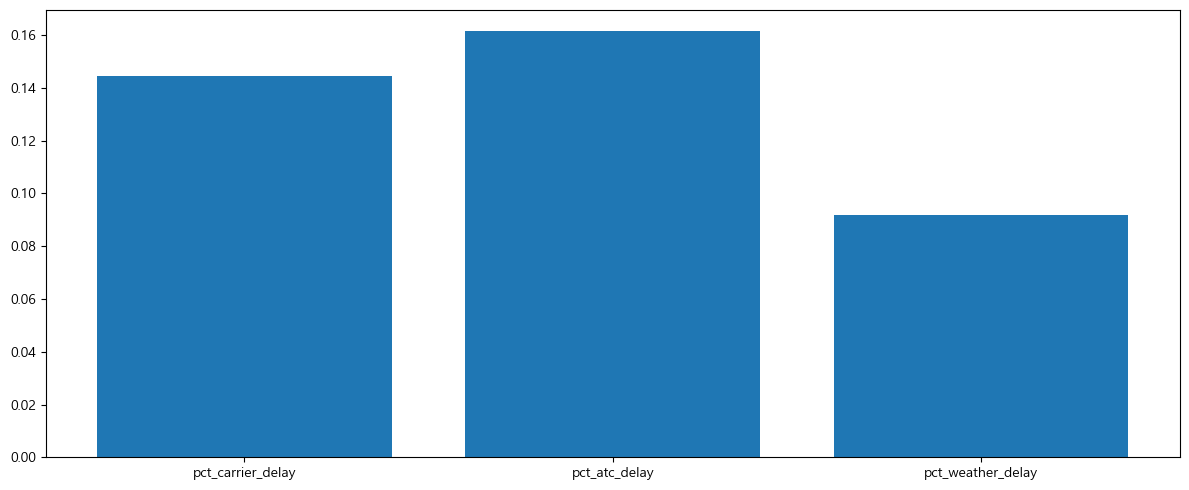

In [137]:
fig = plt.figure(figsize=(12, 5))

plt.bar(
    np.arange(3), 
    [df2['pct_carrier_delay']['pct_atc_delay'],
     df2['pct_carrier_delay']['pct_weather_delay'],
     df2['pct_weather_delay']['pct_atc_delay']
     ]
    )
plt.xticks(np.arange(3), df2.index)
plt.tight_layout()

-------------------------

### 특히 Southwest 항공사의 경우가 날씨 때문에 관제탑에서 지연 시킬 가능성이 더 높게 나타났다.

In [138]:
df_corr = df.groupby('airline').corr()
df_corr

pct_carrier_delay  pct_atc_delay  \
airline                                                         
Alaska    pct_carrier_delay           1.000000       0.067008   
          pct_atc_delay               0.067008       1.000000   
          pct_weather_delay           0.026046       0.031309   
American  pct_carrier_delay           1.000000       0.104717   
          pct_atc_delay               0.104717       1.000000   
          pct_weather_delay           0.078642       0.027266   
Delta     pct_carrier_delay           1.000000       0.170228   
          pct_atc_delay               0.170228       1.000000   
          pct_weather_delay           0.163264       0.080593   
Jet Blue  pct_carrier_delay           1.000000       0.152636   
          pct_atc_delay               0.152636       1.000000   
          pct_weather_delay           0.158197       0.082693   
Southwest pct_carrier_delay           1.000000       0.210296   
          pct_atc_delay               0.210296       1.000000   
          pct_weather_delay           0.159175       0.603584   
United    pct_carrier_delay           1.000000       0.144685   
          pct_atc_delay               0.144685       1.000000   
          pct_weather_delay           0.165321       0.046689   

                             pct_weather_delay  
airline                                         
Alaska    pct_carrier_delay           0.026046  
          pct_atc_delay               0.031309  
          pct_weather_delay           1.000000  
American  pct_carrier_delay           0.078642  
          pct_atc_delay               0.027266  
          pct_weather_delay           1.000000  
Delta     pct_carrier_delay           0.163264  
          pct_atc_delay               0.080593  
          pct_weather_delay           1.000000  
Jet Blue  pct_carrier_delay           0.158197  
          pct_atc_delay               0.082693  
          pct_weather_delay           1.000000  
Southwest pct_carrier_delay           0.159175  
          pct_atc_delay               0.603584  
          pct_weather_delay           1.000000  
United    pct_carrier_delay           0.165321  
          pct_atc_delay               0.046689  
          pct_weather_delay           1.000000

In [139]:
label = list(set([i[0] for i in df_corr.index]))
label

['United', 'American', 'Alaska', 'Jet Blue', 'Southwest', 'Delta']

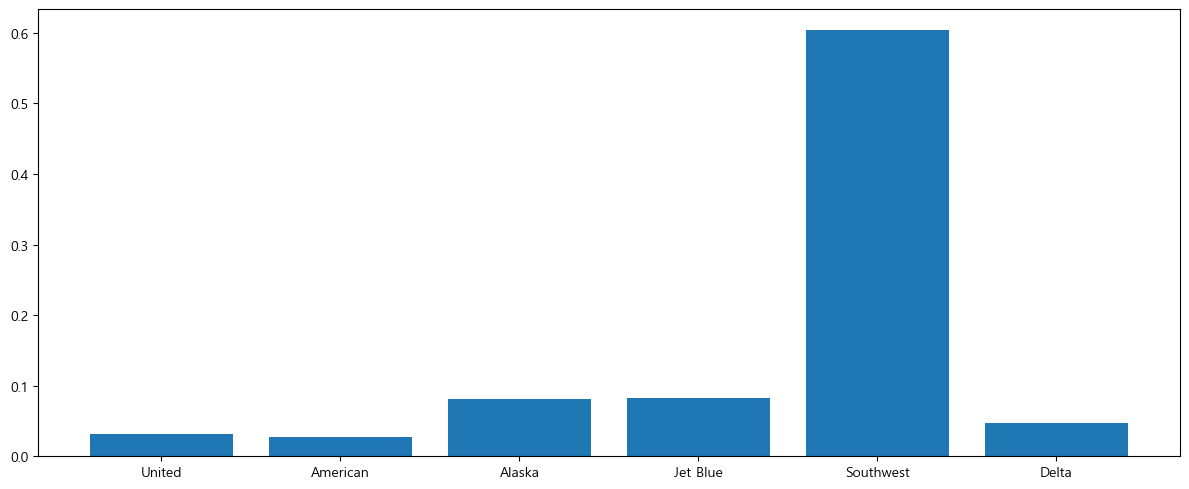

In [140]:
fig = plt.figure(figsize=(12, 5))

plt.bar(np.arange(6),
        [
        df_corr.loc['Alaska']['pct_atc_delay'].loc['pct_weather_delay'],
        df_corr.loc['American']['pct_atc_delay'].loc['pct_weather_delay'],
        df_corr.loc['Delta']['pct_atc_delay'].loc['pct_weather_delay'],
        df_corr.loc['Jet Blue']['pct_atc_delay'].loc['pct_weather_delay'],
        df_corr.loc['Southwest']['pct_atc_delay'].loc['pct_weather_delay'],
        df_corr.loc['United']['pct_atc_delay'].loc['pct_weather_delay'],
        ]

        )
plt.xticks(np.arange(6), label)
plt.tight_layout()

------------------------------

### by GPT
Chat GPT 를 통해 분석 했을 경우
 
- 항공사별 평균 지연 비율 계산   
- 지연 유형 간 상관관계   
- 50% 이상 지연 케이스   

를 도출

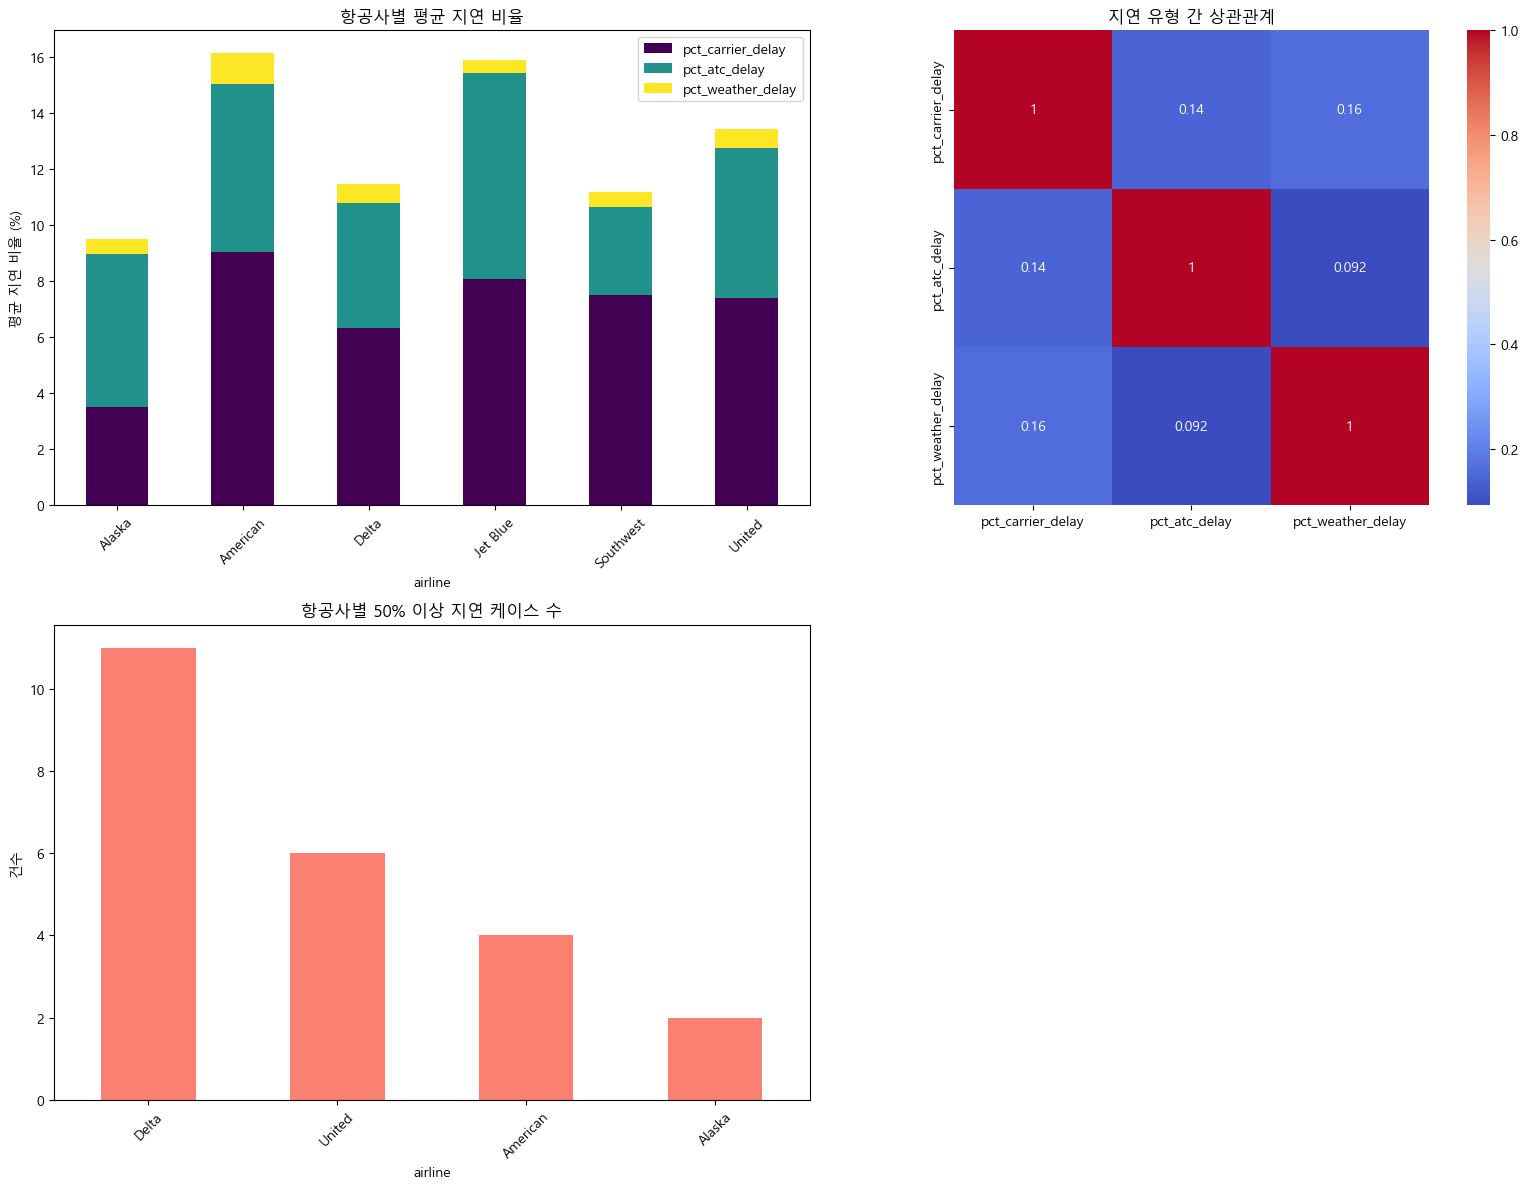

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 제거
df_clean = df.dropna()

# 항공사별 평균 지연 비율 계산
airline_means = df_clean.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

# 지연 유형 간 상관관계
correlation_matrix = df_clean[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()

# 50% 이상 지연 케이스
extreme_cases = df_clean[
    (df_clean['pct_carrier_delay'] > 50) |
    (df_clean['pct_atc_delay'] > 50) |
    (df_clean['pct_weather_delay'] > 50)
]

# 항공사별 Extreme Case 수
extreme_counts = extreme_cases['airline'].value_counts()

# 시각화 준비
plt.figure(figsize=(16, 12))

# 1. 항공사별 평균 지연 비율
plt.subplot(2, 2, 1)
airline_means.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("항공사별 평균 지연 비율")
plt.ylabel("평균 지연 비율 (%)")
plt.xticks(rotation=45)

# 2. 지연 유형 간 상관관계
plt.subplot(2, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("지연 유형 간 상관관계")

# 3. 50% 이상 지연 케이스 수
plt.subplot(2, 2, 3)
extreme_counts.plot(kind='bar', color='salmon')
plt.title("항공사별 50% 이상 지연 케이스 수")
plt.ylabel("건수")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
